In [12]:
import numpy as np
import pandas as pd
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go# Get unique years and players

import re

In [2]:
cols = list(pd.read_excel("catan_data.xlsx").iloc[0,:])

data = pd.read_excel("catan_data.xlsx").iloc[1:,:]

data.columns = cols

data["game_id"] = data["season"]*100 + data["game"]

C:\Users\maxfu\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\maxfu\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
data

,season,Session,game,loc,geoloc,player,score,special,place,position,...,prox_port_gen,t_sum_wood,t_sum_clay,t_sum_sheep,t_sum_grain,t_sum_ore,t_sum_paper,t_sum_coin,t_sum_fabric,game_id
1,2022,2022-03-19 00:00:00,1,Husum (Memeler Str.),"54.491864, 9.030382",PF,7,NaN,2,first,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202201
2,2022,2022-03-19 00:00:00,1,Husum (Memeler Str.),"54.491864, 9.030382",MF,14,NaN,1,second,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202201
3,2022,2022-03-19 00:00:00,1,Husum (Memeler Str.),"54.491864, 9.030382",JHC,5,NaN,3,third,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202201
4,2022,2022-03-19 00:00:00,2,Husum (Memeler Str.),"54.491864, 9.030382",JHC,7,NaN,2,first,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202202
5,2022,2022-03-19 00:00:00,2,Husum (Memeler Str.),"54.491864, 9.030382",MF,13,NaN,1,second,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2024,2024-12-20 00:00:00,44,Husum (Memeler Str.),"54.491864, 9.030382",MF,5,1,3,second,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202444
288,2024,2024-12-20 00:00:00,44,Husum (Memeler Str.),"54.491864, 9.030382",PF,13,5,1,third,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202444
289,2024,2024-12-20 00:00:00,45,Husum (Memeler Str.),"54.491864, 9.030382",JHC,13,5,1,first,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202445
290,2024,2024-12-20 00:00:00,45,Husum (Memeler Str.),"54.491864, 9.030382",MF,10,2,2,second,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202445


In [4]:
points_cum = data[["game_id","Session","season","game","loc","player","place"]].copy()

In [5]:
#punkte je spiel berechnen
points_cum["points"] = points_cum["place"].map({1:2,2:1,3:0})
# neue spalten für kumulierte werte erstellen
points_cum["points_cum"] = np.nan
points_cum["points_cum_ytd"] = np.nan

In [6]:
points_cum_jhc = points_cum.loc[points_cum["player"]=="JHC"].copy()
points_cum_pf = points_cum.loc[points_cum["player"]=="PF"].copy()
points_cum_mf = points_cum.loc[points_cum["player"]=="MF"].copy()

In [7]:
for dude in [points_cum_jhc,points_cum_mf,points_cum_pf]:
    for i in dude.index:
        
        cutoff = dude.loc[dude.index==i]["game_id"].iloc[0]
        #kumulierte gesamtpunkte setzen
        dude.loc[dude.index==i,"points_cum"] = dude.loc[dude["game_id"]<=cutoff]["points"].sum()
        # kumulierte punkte seit jahresbeginn
        dude.loc[dude.index==i,"points_cum_ytd"] = dude.loc[(dude["game_id"]<=cutoff) & (dude["season"]==int(str(cutoff)[:4]))]["points"].sum()
        

In [8]:
points_cum_new = pd.concat([points_cum_jhc,points_cum_pf,points_cum_mf]).sort_index()

In [9]:
points_cum_new

,game_id,Session,season,game,loc,player,place,points,points_cum,points_cum_ytd
1,202201,2022-03-19 00:00:00,2022,1,Husum (Memeler Str.),PF,2,1,1.0,1.0
2,202201,2022-03-19 00:00:00,2022,1,Husum (Memeler Str.),MF,1,2,2.0,2.0
3,202201,2022-03-19 00:00:00,2022,1,Husum (Memeler Str.),JHC,3,0,0.0,0.0
4,202202,2022-03-19 00:00:00,2022,2,Husum (Memeler Str.),JHC,2,1,1.0,1.0
5,202202,2022-03-19 00:00:00,2022,2,Husum (Memeler Str.),MF,1,2,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...
287,202444,2024-12-20 00:00:00,2024,44,Husum (Memeler Str.),MF,3,0,77.0,44.0
288,202444,2024-12-20 00:00:00,2024,44,Husum (Memeler Str.),PF,1,2,110.0,44.0
289,202445,2024-12-20 00:00:00,2024,45,Husum (Memeler Str.),JHC,1,2,103.0,46.0
290,202445,2024-12-20 00:00:00,2024,45,Husum (Memeler Str.),MF,2,1,78.0,45.0


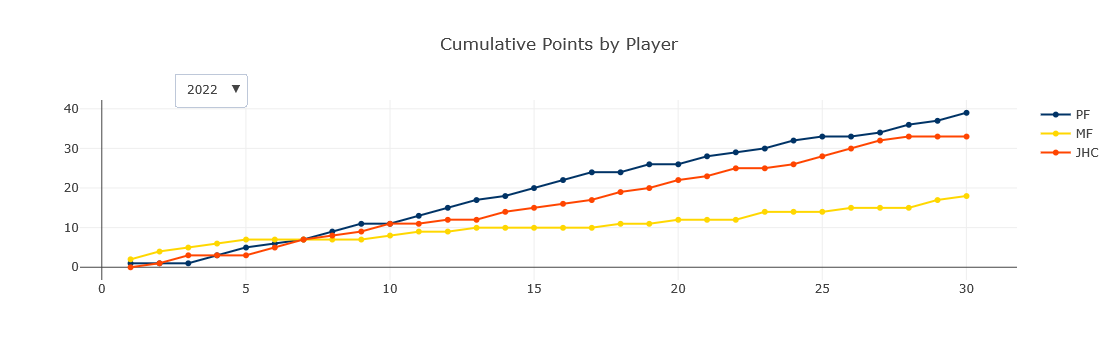

In [16]:
# Define custom colors for each player.
player_colors = {
    'PF': '#003366',   # nice deep blue
    'JHC': '#FF4500',     # fiery red
    'MF': '#FFD700'  # strong and visible yellow
}



# Get unique years and players
years = sorted(points_cum_new['season'].unique())
players = points_cum_new['player'].unique()

# Build the figure with one trace per (year, player) combination.
fig = go.Figure()
visibility_dict = {}  # to keep track of trace indices for each year
trace_idx = 0

for year in years:
    visibility_dict[year] = []
    for player in players:
        # Filter data for the current year and player.
        filtered_df = points_cum_new[(points_cum_new['season'] == year) & (points_cum_new['player'] == player)]
        fig.add_trace(go.Scatter(
            x=filtered_df['game'],  # x-axis: game number within the year
            y=filtered_df['points_cum_ytd'],  # y-axis: cumulative points for the season
            mode='lines+markers',
            name=player,
            line=dict(color=player_colors.get(player, 'black')),  # set line color from the dictionary
            marker=dict(color=player_colors.get(player, 'black'))   # set marker color as well
        ))
        visibility_dict[year].append(trace_idx)
        trace_idx += 1

# Create dropdown buttons to filter by year.
dropdown_buttons = []
for year in years:
    # Create a list of booleans: only traces corresponding to the selected year are visible.
    vis = [False] * trace_idx
    for idx in visibility_dict[year]:
        vis[idx] = True
    dropdown_buttons.append(
        dict(
            label=str(year),
            method='update',
            args=[{'visible': vis},
                  {'title': 'Cumulative Points for Year ' + str(year)}]
        )
    )

# Add the update menu (dropdown) to the layout.
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.1,
        'y': 1.15,
        'xanchor': 'left',
        'yanchor': 'top'
    }],
    title='Cumulative Points by Player'
)

# Set initial visibility to the first year.
initial_year = years[0]
initial_vis = [False] * trace_idx
for idx in visibility_dict[initial_year]:
    initial_vis[idx] = True
for i in range(trace_idx):
    fig.data[i].visible = initial_vis[i]

# Display the figure in your Streamlit app.
#st.plotly_chart(fig)

fig.show()